In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
db = mysql.connector.connect(host="localhost",
                              username="root",
                              password="pankaj1234",
                              database="ecom")

cur = db.cursor(buffered=True)


# 1. list unique cities where customers are located

In [3]:
query = """SELECT DISTINCT(customer_city) FROM customers"""
cur.execute(query)
data = cur.fetchall()

for city in data:
    print(city)

('franca',)
('sao bernardo do campo',)
('sao paulo',)
('mogi das cruzes',)
('campinas',)
('jaragua do sul',)
('timoteo',)
('curitiba',)
('belo horizonte',)
('montes claros',)
('rio de janeiro',)
('lencois paulista',)
('caxias do sul',)
('piracicaba',)
('guarulhos',)
('pacaja',)
('florianopolis',)
('aparecida de goiania',)
('santo andre',)
('goiania',)
('cachoeiro de itapemirim',)
('sao jose dos campos',)
('sao roque',)
('camacari',)
('resende',)
('sumare',)
('novo hamburgo',)
('sao luis',)
('sao jose',)
('santa barbara',)
('ribeirao preto',)
('ituiutaba',)
('taquarituba',)
('sao jose dos pinhais',)
('barrinha',)
('parati',)
('dourados',)
('trindade',)
('cascavel',)
('fortaleza',)
('brasilia',)
('pelotas',)
('porto alegre',)
('salto',)
('jundiai',)
('cacapava',)
('sao vicente',)
('uberlandia',)
('botelhos',)
('sao goncalo',)
('araucaria',)
('nova iguacu',)
('areia branca',)
('campos dos goytacazes',)
('sao carlos',)
('itajuba',)
('cruz das almas',)
('vassouras',)
('feira de santana',)
(

# 2. Count the number of orders placed in 2017.

In [4]:
query = """select count(order_id) as orders_placed_in_2017 from ecom.orders
where year(order_delivered_customer_date) = 2017"""
cur.execute(query)
data = cur.fetchall()
data[0][0]

81860

# 3. Find the total sales per category.
  

In [5]:
query = """SELECT upper(product_category),round(sum(price),2) total_sales FROM ecom.products
join ecom.order_items ON products.product_id = order_items.product_id
group by product_category order by total_sales desc"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["category","sales"])
df

,category,sales
0,HEALTH BEAUTY,5034725.36
1,WATCHES PRESENT,4820022.71
2,BED TABLE BATH,4147954.72
3,SPORT LEISURE,3952195.88
4,COMPUTER ACCESSORIES,3647817.27
...,...,...
69,FLOWERS,4440.16
70,HOUSE COMFORT 2,3041.08
71,CDS MUSIC DVDS,2920.00
72,FASHION CHILDREN'S CLOTHING,2279.40


# 4. Calculate the percentage of orders that were paid in installments.


In [6]:
query = """SELECT concat(round((count(payment_installments)*100)/103886,2)," %") as installments_orders  FROM ecom.payments where
payment_installments != 1;
"""
cur.execute(query)
data = cur.fetchall()
df =pd.DataFrame(data,columns=["orders that were paid in installments"])
df

,orders that were paid in installments
0,49.42 %


# 5. Count the number of customers from each state. 


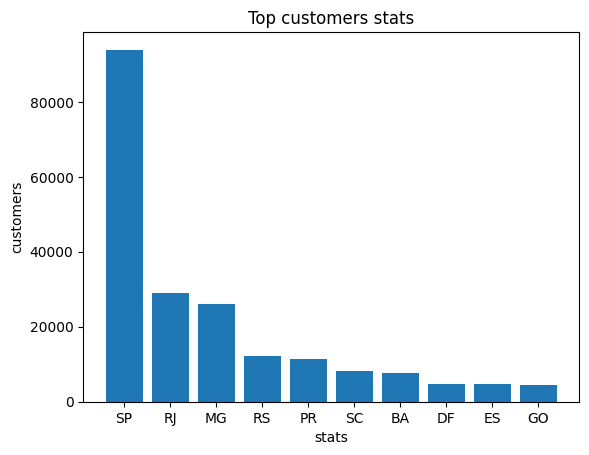

In [7]:
query = """SELECT 
    customer_state, COUNT(customer_id) AS customers
FROM
    ecom.customers
GROUP BY customer_state
ORDER BY customers DESC
limit 10;"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["stats","customers"])
df
plt.bar(df["stats"],df["customers"])
plt.title("Top customers stats")
plt.xlabel("stats")
plt.ylabel("customers")
plt.show()

# Intermediate Queries
# 1. Calculate the number of orders per month in 2018.


      months  orders
0    January   14538
1      March   14422
2      April   13878
3        May   13746
4   February   13456
5     August   13024
6       July   12584
7       June   12334
8  September      32
9    October       8


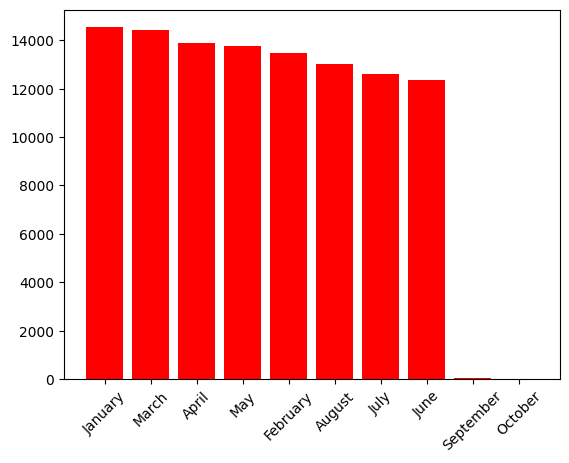

In [8]:
query = """SELECT 
    MONTHNAME(order_purchase_timestamp) AS months,
    COUNT(order_id) AS orders
FROM
    ecom.orders
WHERE
    YEAR(order_purchase_timestamp) = 2018
GROUP BY months
ORDER BY orders desc"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["months","orders"])
print(df.head(10))
plt.bar(df["months"],df["orders"],color="red")
plt.xticks(rotation=45)
plt.show()

# 2. Find the average number of products per order, grouped by customer city.


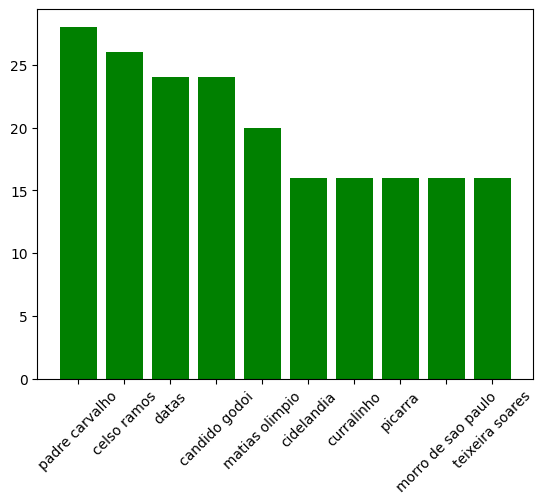

In [9]:
query = """WITH count_per_order AS (
    SELECT 
        orders.order_id,
        orders.customer_id,
        COUNT(order_items.order_id) AS order_count 
    FROM
        orders
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
)

SELECT 
    customers.customer_city,
    round(AVG(count_per_order.order_count),2) AS avg_products_per_order
FROM 
    count_per_order
JOIN customers ON count_per_order.customer_id = customers.customer_id
GROUP BY customers.customer_city
ORDER BY avg_products_per_order DESC;"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["customer_city","avg_products_per_order"])
df.head(10)
df = df.head(10)
plt.bar(df["customer_city"],df["avg_products_per_order"],color="green")
plt.xticks(rotation=45)
plt.show()

# 3. Calculate the percentage of total revenue contributed by each product category.


In [10]:
q = """SELECT 
    product_category,
    ROUND(
        (SUM(payments.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100,
        2
    ) AS revenue_percentage
FROM 
    products 
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    payments ON payments.order_id = order_items.order_id
GROUP BY 
    product_category
ORDER BY 
    revenue_percentage DESC;


"""

cur.execute(q)
data = cur.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=["Category", "Sales_Percentage"])
df = df.head(10)
df

,Category,Sales_Percentage
0,bed table bath,42.79
1,HEALTH BEAUTY,41.41
2,computer accessories,39.61
3,Furniture Decoration,35.73
4,Watches present,35.71
5,sport leisure,34.78
6,housewares,27.35
7,automotive,21.30
8,Garden tools,20.95
9,Cool Stuff,19.48


# 4. Identify the correlation between product price and the number of times a product has been purchased.


In [11]:
q = """select products.product_category, count(order_items.product_id), round(avg(price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;
"""
cur.execute(q)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Category", "Sales_Count","price"])
df = df.head(10)
df
ar1 = df["Sales_Count"]
ar2 = df["price"]
a = np.corrcoef([ar1,ar2])
print("The correlation between product price and the number of times a product has been purchased is",a[0][1])

The correlation between product price and the number of times a product has been purchased is -0.01203751874500158


# 5. Calculate the total revenue generated by each seller, and rank them by revenue.

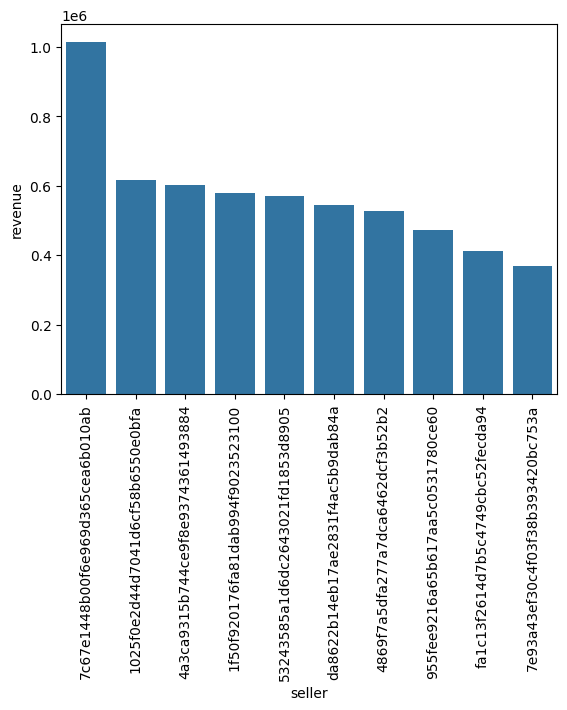

In [12]:
q = """select *, dense_rank() over(order by Revenue desc) from (select order_items.seller_id, round(sum(payment_value),2) as Revenue
from order_items join payments
on payments.order_id=order_items.order_id
group by seller_id) as a; """
cur.execute(q)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["seller", "revenue","rank"])
df = df.head(10)
df
sns.barplot(x="seller",y="revenue",data=df)
plt.xticks(rotation=90)
plt.show()

# Advanced Queries
# 1. Calculate the moving average of order values for each customer over their order history.

In [13]:
q = """select customer_id,
order_purchase_timestamp,
avg(payments) over(partition by customer_id order by order_purchase_timestamp
 rows between 2 preceding and current row) as mov_avg
from
(select customer_id,order_purchase_timestamp,payment_value as payments
from orders join payments
on orders.order_id = payments.order_id) as a;"""
cur.execute(q)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["customer_id", "order_time","Moving_Average"])
df

,customer_id,order_time,Moving_Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
4,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.419998
...,...,...,...
207767,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.130005
207768,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000
207769,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000
207770,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001


# 2. Calculate the cumulative sales per month for each year.


In [15]:
q = """select year, month,round(sales) as sales,
round(sum(sales) over(partition by year rows between unbounded preceding and current row),2) as cumulative_sales
from (select year(order_purchase_timestamp) as year,
month(order_purchase_timestamp) as month,
sum(payments.payment_value) as sales
from orders join payments
on orders.order_id = payments.order_id
group by year,month
order by year,month) as a;"""
cur.execute(q)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["year", "month","sales","Cumulative_sales"])
df

,year,month,sales,Cumulative_sales
0,2016,9,504.0,504.48
1,2016,10,118181.0,118685.44
2,2016,12,39.0,118724.68
3,2017,1,276976.0,276976.08
4,2017,2,583816.0,860792.10
5,2017,3,899727.0,1760519.30
6,2017,4,835576.0,2596095.36
7,2017,5,1185838.0,3781933.00
8,2017,6,1022553.0,4804485.76
9,2017,7,1184766.0,5989251.60


# 3. Calculate the year-over-year growth rate of total sales.


In [29]:
q = """select year,round(sales), concat(round(((sales-lag(sales) over(order by year))/lag(sales) over(order by year))*100,2)," %")
from
(select year(order_purchase_timestamp) as year,
sum(payments.payment_value) as sales
from orders join payments
on orders.order_id = payments.order_id
group by year
order by year) as a;"""
cur.execute(q)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["year","sales","YOY % growth"])
df

,year,sales,YOY % growth
0,2016,118725.0,None
1,2017,14499493.0,12112.7 %
2,2018,17399526.0,20 %


# 4. Identify the top 3 customers who spent the most money in each year.

In [40]:
q = """select years,customer_id,sales,d_rank from
(select year(order_purchase_timestamp) as years,customer_id,
sum(payments.payment_value) as sales,
dense_rank() over(partition by year(order_purchase_timestamp)
order by sum(payments.payment_value) desc) as d_rank
from orders join payments
on orders.order_id = payments.order_id
group by years,customer_id) as a
where d_rank <= 3;"""
cur.execute(q)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["year","customer","sales","Rank"])
df

,year,customer,sales,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,2847.100098,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,2801.479980,2
2,2016,4a06381959b6670756de02e07b83815f,2455.560059,3
3,2017,1617b1357756262bfa56ab541c47bc16,27328.160156,1
4,2017,c6e2731c5b391845f6800c97401a43a9,13858.620117,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,13453.320312,3
6,2018,ec5b2ba62e574342386871631fafd3fc,14549.759766,1
7,2018,f48d464a0baaea338cb25f816991ab1f,13844.419922,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,9618.879883,3


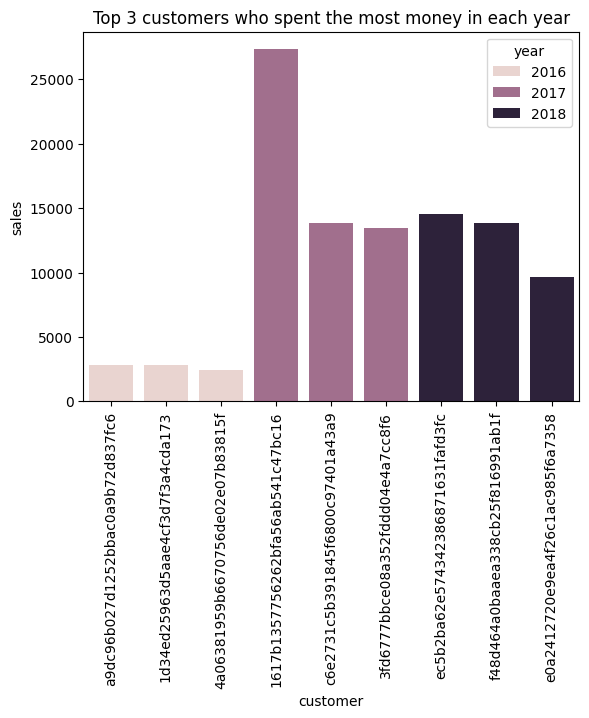

In [50]:
sns.barplot(x="customer",y="sales",data=df,hue="year")
plt.xticks(rotation=90)
plt.title("Top 3 customers who spent the most money in each year")
plt.show()